# 1.学习率调整策略

Q:_LRScheduler的主要属性和方法有哪些？
- 属性：
- optimizer：关联的优化器
- last_epoch：记录epoch数
- base_lrs：记录初始学习率
- 方法：
- step()：更新下一个epoch的学习率
- get_lr()：虚函数，计算下一个epoch的学习率

Q:如何等间隔调整学习率？
- `torch.optim.lr_scheduler.StepLR(optimizer, step_size, gamma=0.1, last_epoch=-1)`
- 调整方式：lr = lr * gamma
- step_size：调整间隔数
- gamma：调整系数

Q:StepLR代码示例

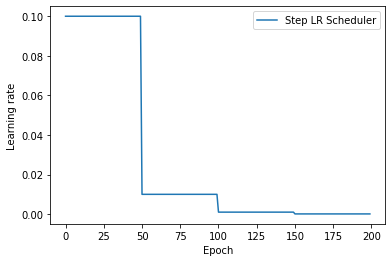

In [2]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)

LR = 0.1
iteration = 10
max_epoch = 200
# ------------------------------ fake data and optimizer  ------------------------------

weights = torch.randn((1), requires_grad=True)
target = torch.zeros((1))

optimizer = optim.SGD([weights], lr=LR, momentum=0.9)

# ------------------------------ 1 Step LR ------------------------------

scheduler_lr = optim.lr_scheduler.StepLR(optimizer, step_size=50, gamma=0.1)  # 设置学习率下降策略

lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):

    # 获取当前lr，新版本用 get_last_lr()函数，旧版本用get_lr()函数，具体看UserWarning
    lr_list.append(scheduler_lr.get_lr())
    epoch_list.append(epoch)

    for i in range(iteration):

        loss = torch.pow((weights - target), 2)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    scheduler_lr.step()

plt.plot(epoch_list, lr_list, label="Step LR Scheduler")
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.legend()
plt.show()

Q:如何按给定间隔调整学习率？
- `torch.optim.lr_scheduler.MultiStepLR(optimizer, milestones, gamma=0.1, last_epoch=-1)`
- milestones：设定调整时刻数
- gamma：调整系数

Q:MultiStepLR的代码示例

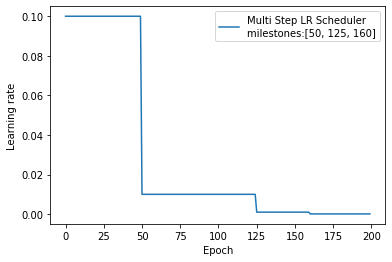

In [3]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)

LR = 0.1
iteration = 10
max_epoch = 200
# ------------------------------ fake data and optimizer  ------------------------------

weights = torch.randn((1), requires_grad=True)
target = torch.zeros((1))

optimizer = optim.SGD([weights], lr=LR, momentum=0.9)

# ------------------------------ 2 Multi Step LR ------------------------------
milestones = [50, 125, 160]
scheduler_lr = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.1)

lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):

    lr_list.append(scheduler_lr.get_lr())
    epoch_list.append(epoch)

    for i in range(iteration):

        loss = torch.pow((weights - target), 2)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    scheduler_lr.step()

plt.plot(epoch_list, lr_list, label="Multi Step LR Scheduler\nmilestones:{}".format(milestones))
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.legend()
plt.show()

Q:如何按指数衰减调整学习率？
- `torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma, last_epoch=-1)`
- gamma：指数的底，通常设为一个接近1的数字，如0.95
- 调整方式：lr = lr * gamma ** epoch

Q:ExponentialLR代码示例

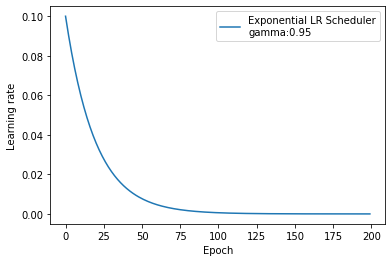

In [4]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)

LR = 0.1
iteration = 10
max_epoch = 200
# ------------------------------ fake data and optimizer  ------------------------------

weights = torch.randn((1), requires_grad=True)
target = torch.zeros((1))

optimizer = optim.SGD([weights], lr=LR, momentum=0.9)

# ------------------------------ 3 Exponential LR ------------------------------
gamma = 0.95
scheduler_lr = optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)

lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):

    lr_list.append(scheduler_lr.get_lr())
    epoch_list.append(epoch)

    for i in range(iteration):

        loss = torch.pow((weights - target), 2)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    scheduler_lr.step()

plt.plot(epoch_list, lr_list, label="Exponential LR Scheduler\ngamma:{}".format(gamma))
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.legend()
plt.show()

Q:如何按余弦周期调整学习率？
- `torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max, eta_min=0, last_epoch=-1)`
- T_max：下降周期
- eta_min：学习率下限
- 调整方式：$$\eta_{t}=\eta_{\min }+\frac{1}{2}\left(\eta_{\max }-\eta_{\min }\right)\left(1+\cos \left(\frac{T_{c u r}}{T_{\max }} \pi\right)\right)$$

Q:CosineAnnealingLR代码示例

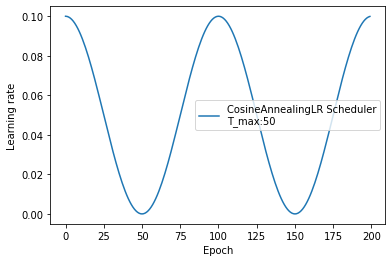

In [5]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)

LR = 0.1
iteration = 10
max_epoch = 200
# ------------------------------ fake data and optimizer  ------------------------------

weights = torch.randn((1), requires_grad=True)
target = torch.zeros((1))

optimizer = optim.SGD([weights], lr=LR, momentum=0.9)

# ------------------------------ 4 Cosine Annealing LR ------------------------------
t_max = 50
scheduler_lr = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=t_max, eta_min=0.)

lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):

    lr_list.append(scheduler_lr.get_lr())
    epoch_list.append(epoch)

    for i in range(iteration):

        loss = torch.pow((weights - target), 2)
        loss.backward()

        optimizer.step()
        optimizer.zero_grad()

    scheduler_lr.step()

plt.plot(epoch_list, lr_list, label="CosineAnnealingLR Scheduler\nT_max:{}".format(t_max))
plt.xlabel("Epoch")
plt.ylabel("Learning rate")
plt.legend()
plt.show()

Q:如何监控指标， 当指标不再变化则调整学习率？
- `torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=10, verbose=False, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0, eps=1e-08)`
- mode：min/max两种模式：如min代表不下降就调整
- factor：调整系数
- patience：“耐心”，接受几次不变化
- cooldown：“冷却时间”，停止监控一段时间
- verbose：是否打印日志
- min_lr：学习率下限
- eps：学习率衰减最小值

Q:ReduceLROnPlateau代码示例

In [6]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)

LR = 0.1
iteration = 10
max_epoch = 200
# ------------------------------ fake data and optimizer  ------------------------------

weights = torch.randn((1), requires_grad=True)
target = torch.zeros((1))

optimizer = optim.SGD([weights], lr=LR, momentum=0.9)

# ------------------------------ 5 Reduce LR On Plateau ------------------------------
loss_value = 0.5
accuray = 0.9

factor = 0.1
mode = "min"
patience = 10
cooldown = 10
min_lr = 1e-4
verbose = True

scheduler_lr = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=factor, mode=mode, patience=patience,
                                                    cooldown=cooldown, min_lr=min_lr, verbose=verbose)

for epoch in range(max_epoch):
    for i in range(iteration):

        # train(...)

        optimizer.step()
        optimizer.zero_grad()

    if epoch == 5:
        loss_value = 0.4

    scheduler_lr.step(loss_value)

Epoch    16: reducing learning rate of group 0 to 1.0000e-02.
Epoch    37: reducing learning rate of group 0 to 1.0000e-03.
Epoch    58: reducing learning rate of group 0 to 1.0000e-04.


Q:如何自定义学习率调整策略？
- `torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda, last_epoch=-1)`
- lr_lambda：function or list，若为list，里面每个元素须为function

Q:LambdaLR的代码示例

epoch:    0, lr:[0.1, 0.095]
epoch:    1, lr:[0.1, 0.09025]
epoch:    2, lr:[0.1, 0.0857375]
epoch:    3, lr:[0.1, 0.081450625]
epoch:    4, lr:[0.1, 0.07737809374999999]
epoch:    5, lr:[0.1, 0.07350918906249998]
epoch:    6, lr:[0.1, 0.06983372960937498]
epoch:    7, lr:[0.1, 0.06634204312890622]
epoch:    8, lr:[0.1, 0.0630249409724609]
epoch:    9, lr:[0.1, 0.05987369392383787]
epoch:   10, lr:[0.1, 0.05688000922764597]
epoch:   11, lr:[0.1, 0.05403600876626367]
epoch:   12, lr:[0.1, 0.051334208327950485]
epoch:   13, lr:[0.1, 0.04876749791155296]
epoch:   14, lr:[0.1, 0.046329123015975304]
epoch:   15, lr:[0.1, 0.04401266686517654]
epoch:   16, lr:[0.1, 0.04181203352191771]
epoch:   17, lr:[0.1, 0.039721431845821824]
epoch:   18, lr:[0.1, 0.03773536025353073]
epoch:   19, lr:[0.010000000000000002, 0.03584859224085419]
epoch:   20, lr:[0.010000000000000002, 0.03405616262881148]
epoch:   21, lr:[0.010000000000000002, 0.0323533544973709]
epoch:   22, lr:[0.010000000000000002, 0.03073

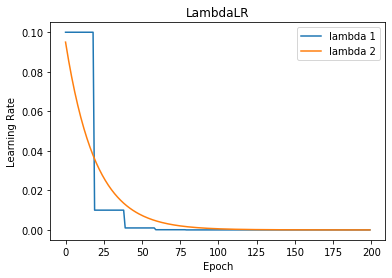

In [7]:
import torch
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
torch.manual_seed(1)

LR = 0.1
iteration = 10
max_epoch = 200
# ------------------------------ fake data and optimizer  ------------------------------

weights = torch.randn((1), requires_grad=True)
target = torch.zeros((1))

optimizer = optim.SGD([weights], lr=LR, momentum=0.9)

# ------------------------------ 6 lambda ------------------------------
lr_init = 0.1

weights_1 = torch.randn((6, 3, 5, 5))
weights_2 = torch.ones((5, 5))

optimizer = optim.SGD([
    {'params': [weights_1]},
    {'params': [weights_2]}], lr=lr_init)

lambda1 = lambda epoch: 0.1 ** (epoch // 20)
lambda2 = lambda epoch: 0.95 ** epoch

scheduler = torch.optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=[lambda1, lambda2])

lr_list, epoch_list = list(), list()
for epoch in range(max_epoch):
    for i in range(iteration):

        # train(...)

        optimizer.step()
        optimizer.zero_grad()

    scheduler.step()

    lr_list.append(scheduler.get_lr())
    epoch_list.append(epoch)

    print('epoch:{:5d}, lr:{}'.format(epoch, scheduler.get_lr()))

plt.plot(epoch_list, [i[0] for i in lr_list], label="lambda 1")
plt.plot(epoch_list, [i[1] for i in lr_list], label="lambda 2")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("LambdaLR")
plt.legend()
plt.show()